# 1. Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [3]:
from datetime import datetime, timedelta

In [4]:
import yfinance as yf

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
start = datetime(2018,1,1)
end = datetime(2023, 11, 23)

In [7]:
google = yf.Ticker('GOOG')
msft=yf.Ticker('MSFT')
appl=yf.Ticker('AAPL')
amzn=yf.Ticker('AMZN')

In [8]:
google_df = google.history(start=start, end=end)
msft_df = msft.history(start=start, end=end)
appl_df=appl.history(start=start, end=end)
amzn_df=amzn.history(start=start, end=end)

In [9]:
google_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,52.417000,53.347000,52.261501,53.250000,24752000,0.0,0.0
2018-01-03 00:00:00-05:00,53.215500,54.314499,53.160500,54.124001,28604000,0.0,0.0
2018-01-04 00:00:00-05:00,54.400002,54.678501,54.200100,54.320000,20092000,0.0,0.0
2018-01-05 00:00:00-05:00,54.700001,55.212502,54.599998,55.111500,25582000,0.0,0.0
2018-01-08 00:00:00-05:00,55.111500,55.563499,55.081001,55.347000,20952000,0.0,0.0


In [10]:
msft_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-11-16 00:00:00-05:00,370.959991,376.350006,370.179993,376.170013,27182300,0.0,0.0
2023-11-17 00:00:00-05:00,373.609985,374.369995,367.000000,369.850006,40157000,0.0,0.0
2023-11-20 00:00:00-05:00,371.220001,378.869995,371.000000,377.440002,52465100,0.0,0.0
2023-11-21 00:00:00-05:00,375.670013,376.220001,371.119995,373.070007,28423100,0.0,0.0
2023-11-22 00:00:00-05:00,378.000000,379.790009,374.970001,377.850006,23345300,0.0,0.0


# 2. Pre-processing

In [11]:
# 选择闭市价
g_returns = 100 * google_df[['Close']].pct_change().dropna() 
ms_returns = 100 * msft_df[['Close']].pct_change().dropna() 
appl_returns=100 * appl_df[['Close']].pct_change().dropna() 
amzn_returns=100 * amzn_df[['Close']].pct_change().dropna() 

### Decomposition

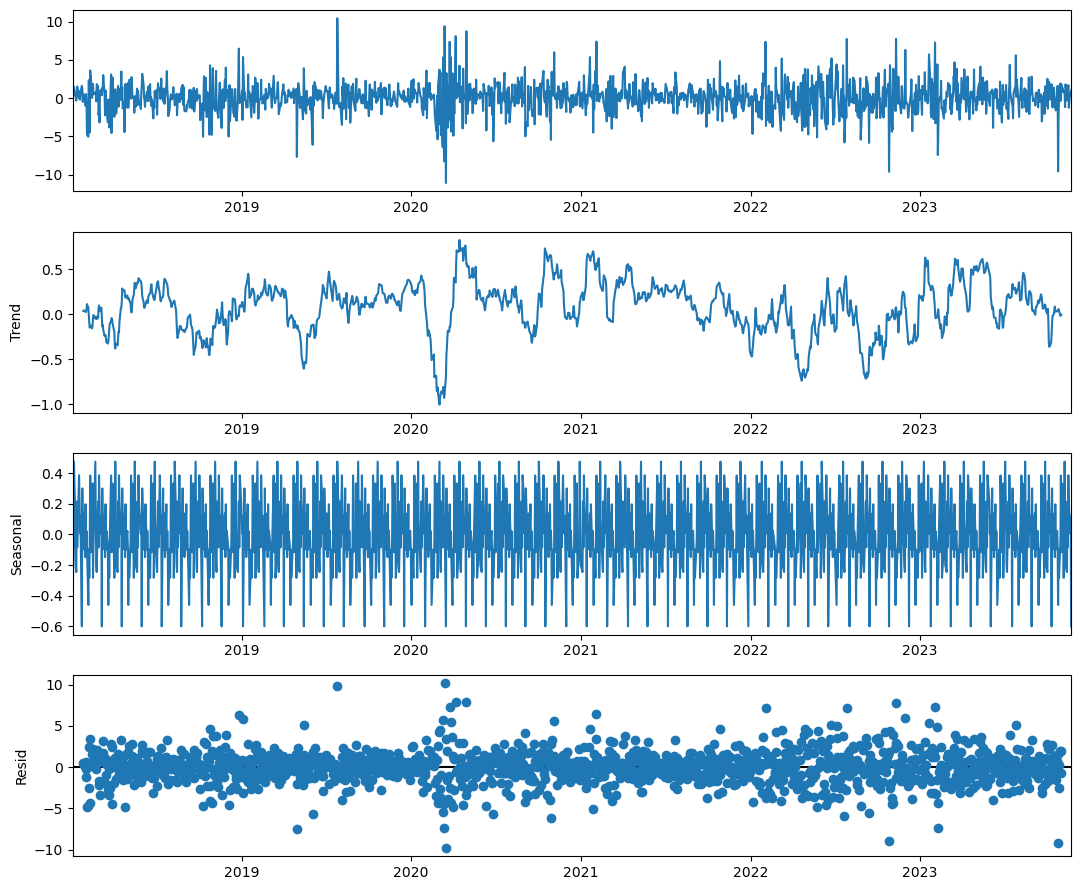

In [12]:
from pylab import rcParams

# Google

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(g_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

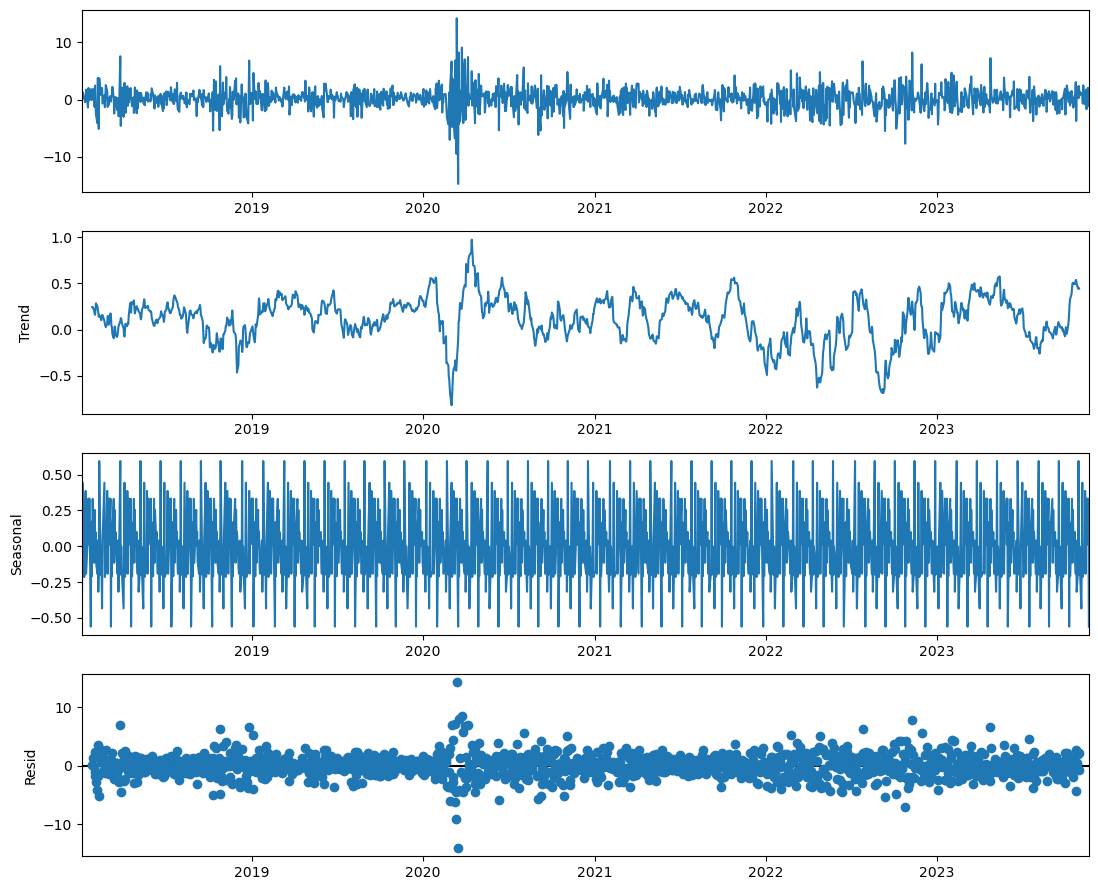

In [13]:
# Microsoft
rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(ms_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

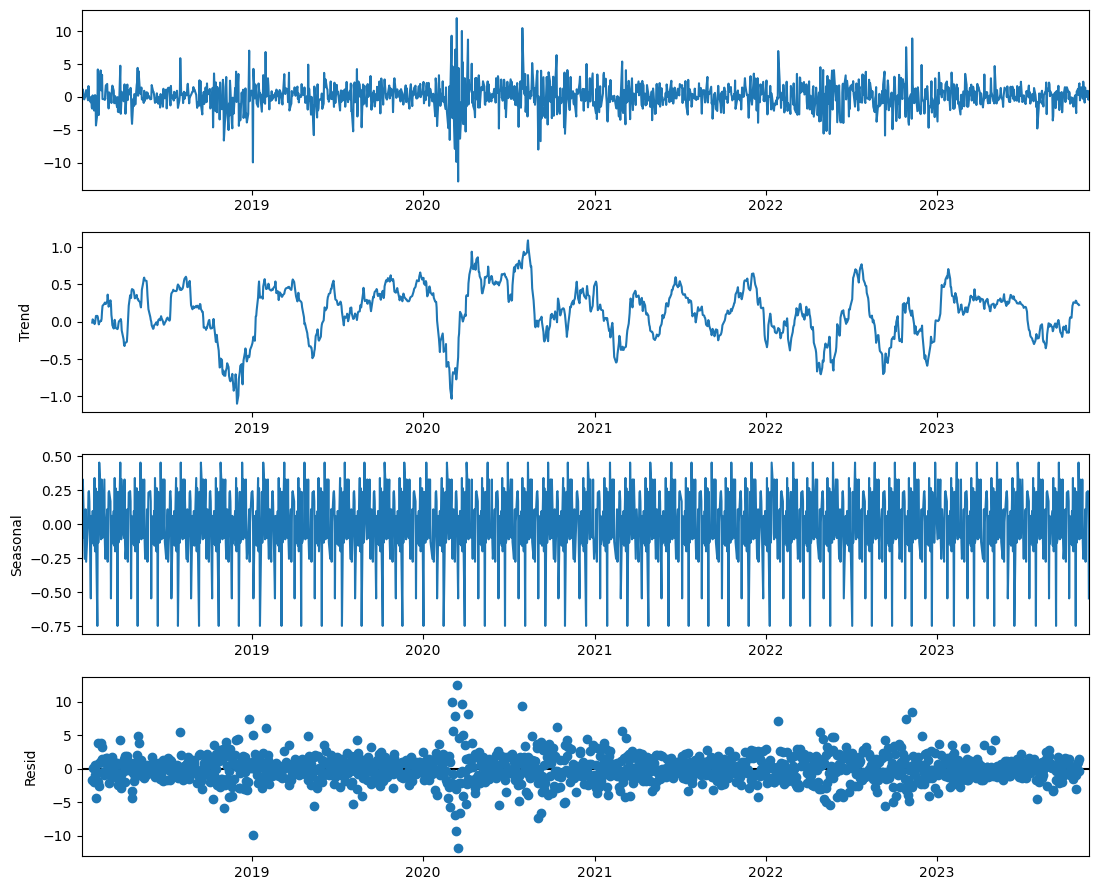

In [14]:
# Apple

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(appl_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

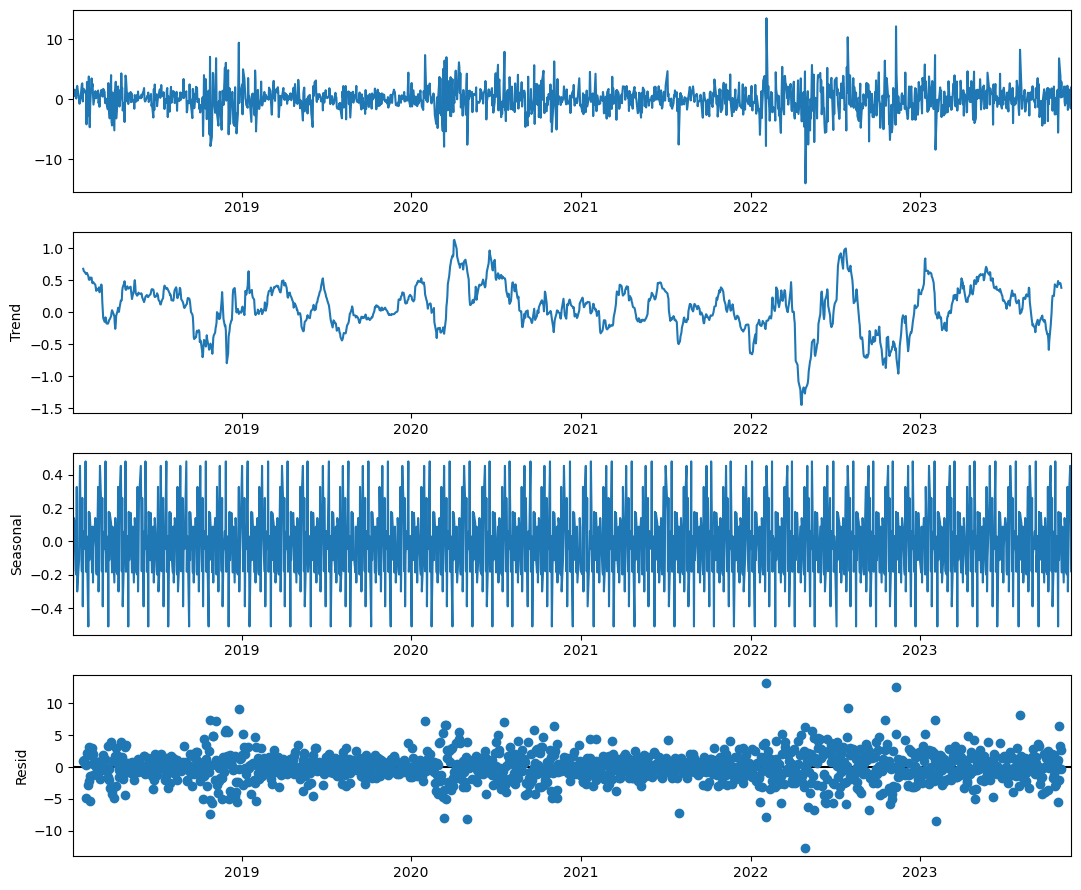

In [15]:
#Amazon

rcParams['figure.figsize'] = 11, 9
decomposed = sm.tsa.seasonal_decompose(amzn_returns,period=30) # Check whether there exists monthly seasonality
figure = decomposed.plot() 
plt.show()

### Correlations

In [16]:
df_all = pd.concat([g_returns, ms_returns, appl_returns, amzn_returns], axis=1)

df_all.columns = ['Google', 'Microsoft', 'Apple', 'Amazon']

df_all.head()

,Google,Microsoft,Apple,Amazon
Date,,,,
2018-01-03 00:00:00-05:00,1.641316,0.465396,-0.017414,1.277531
2018-01-04 00:00:00-05:00,0.362130,0.880137,0.464519,0.447601
2018-01-05 00:00:00-05:00,1.457106,1.239808,1.138499,1.616252
2018-01-08 00:00:00-05:00,0.427316,0.102022,-0.371404,1.442468
2018-01-09 00:00:00-05:00,-0.061431,-0.067939,-0.011458,0.467571


Text(0.5, 1.0, 'Correlation of stock closing return')

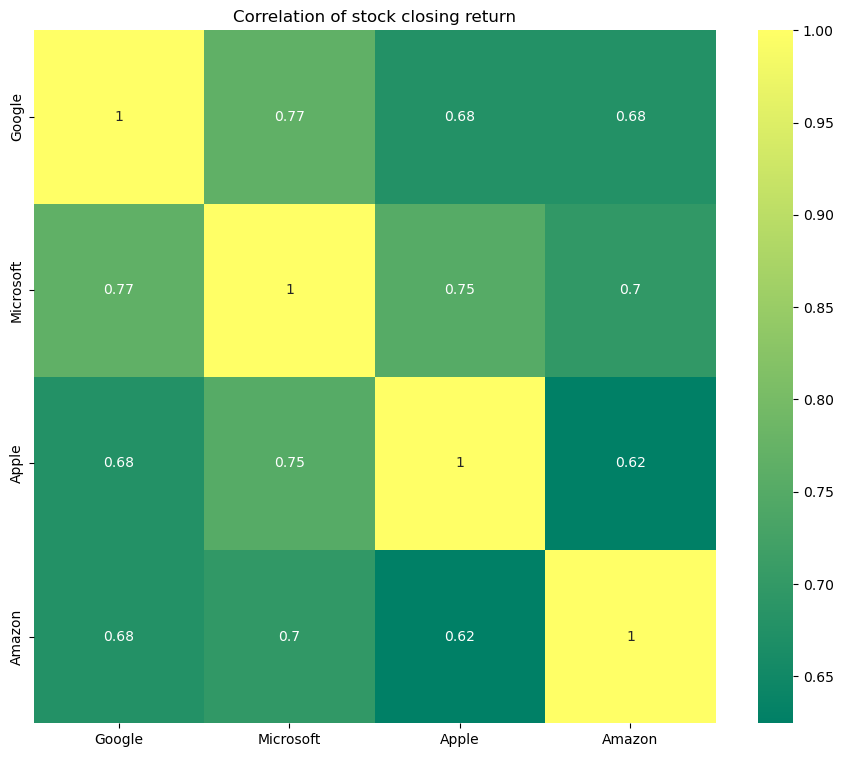

In [17]:
import seaborn as sns

plt.figure()
sns.heatmap(df_all.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing return')

## Stationarity Check

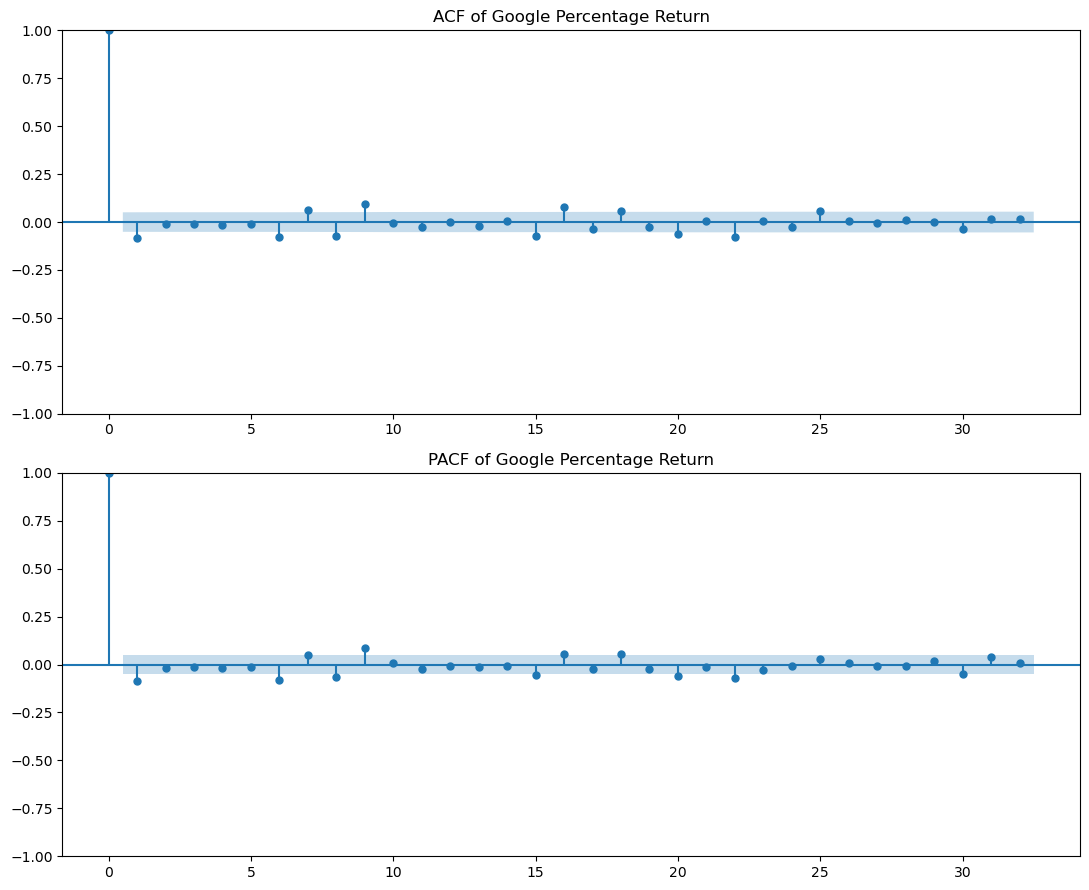

In [18]:
fig, axs = plt.subplots(2)

plot_acf(g_returns, ax=axs[0])
axs[0].set_title('ACF of Google Percentage Return')
plot_pacf(g_returns, ax=axs[1])
axs[1].set_title('PACF of Google Percentage Return')

plt.tight_layout()
plt.show()

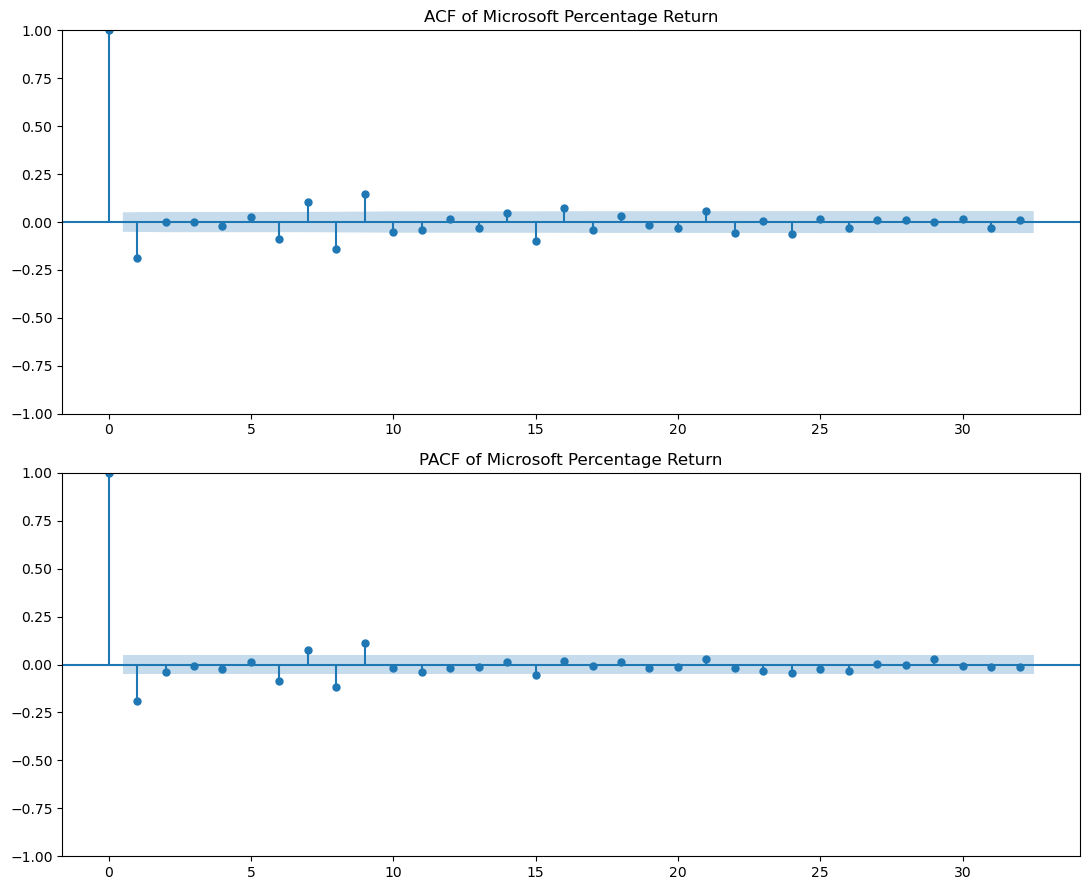

In [19]:
fig, axs = plt.subplots(2)

plot_acf(ms_returns, ax=axs[0])
axs[0].set_title('ACF of Microsoft Percentage Return')
plot_pacf(ms_returns, ax=axs[1])
axs[1].set_title('PACF of Microsoft Percentage Return')

plt.tight_layout()
plt.show()

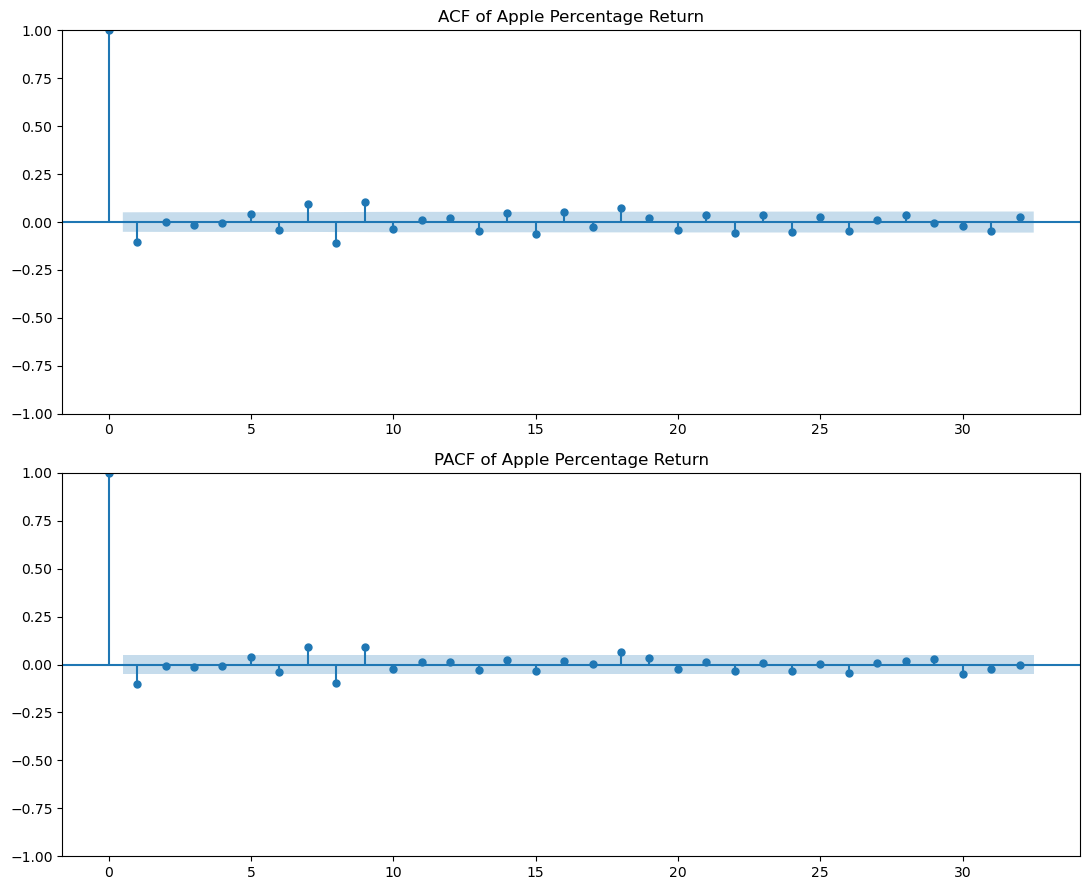

In [20]:
fig, axs = plt.subplots(2)

plot_acf(appl_returns, ax=axs[0])
axs[0].set_title('ACF of Apple Percentage Return')
plot_pacf(appl_returns, ax=axs[1])
axs[1].set_title('PACF of Apple Percentage Return')

plt.tight_layout()
plt.show()

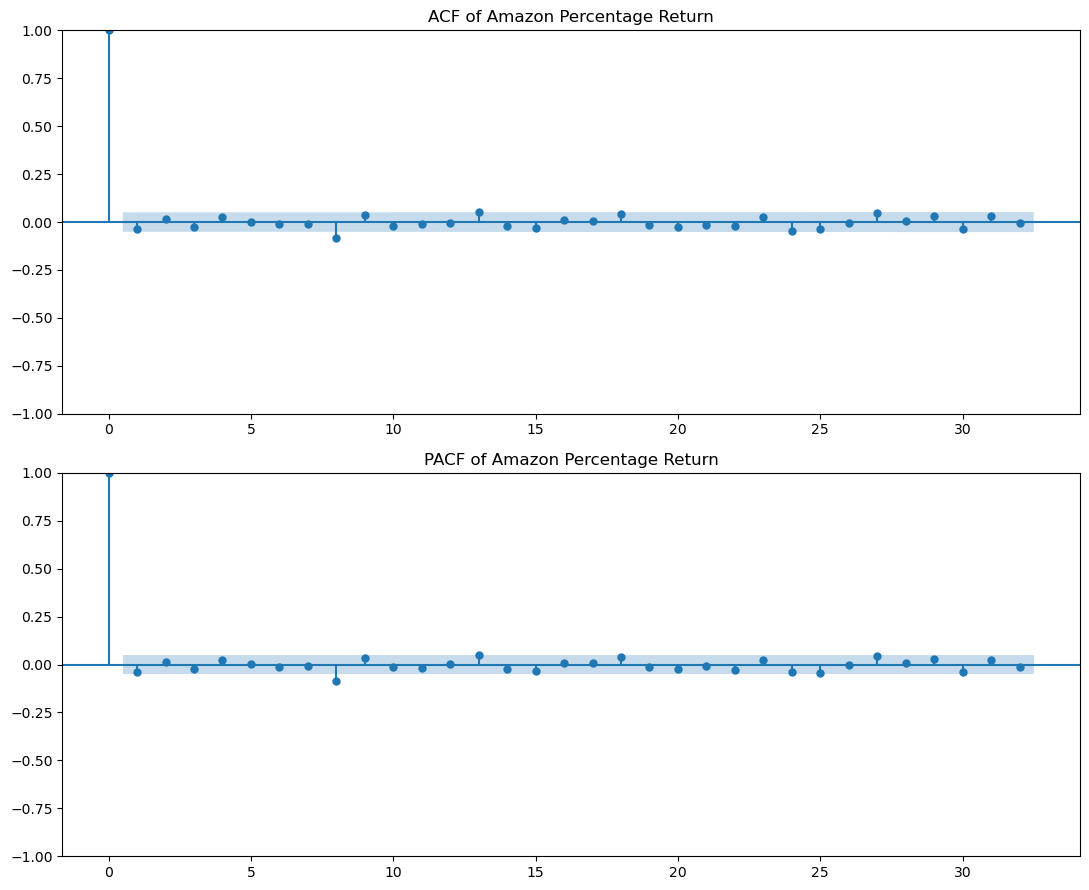

In [21]:
fig, axs = plt.subplots(2)

plot_acf(amzn_returns, ax=axs[0])
axs[0].set_title('ACF of Amazon Percentage Return')
plot_pacf(amzn_returns, ax=axs[1])
axs[1].set_title('PACF of Amazon Percentage Return')

plt.tight_layout()
plt.show()

### The Augmented Dickey-Fuller test

In [22]:
from statsmodels.tsa.stattools import adfuller

goo_adftest = adfuller(g_returns)
goo_adf_results= pd.Series(goo_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in goo_adftest[4].items():
    goo_adf_results['Critical Value (%s)'%key] = value
goo_adf_results

Test Statistic                -9.414402e+00
p-value                        5.720638e-16
#Lags Used                     2.100000e+01
Number of Observations Used    1.461000e+03
Critical Value (1%)           -3.434834e+00
Critical Value (5%)           -2.863520e+00
Critical Value (10%)          -2.567824e+00
dtype: float64

In [23]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [24]:
msft_adftest = adfuller(ms_returns)
msft_adf_results= pd.Series(msft_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in msft_adftest[4].items():
    msft_adf_results['Critical Value (%s)'%key] = value
msft_adf_results

Test Statistic                -1.291611e+01
p-value                        3.963032e-24
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [25]:
# As the p-value is less than 0.05, so reject the null hypothesis. Thus, the data is stationary.

In [26]:
appl_adftest = adfuller(appl_returns)
appl_adf_results= pd.Series(appl_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in appl_adftest[4].items():
    appl_adf_results['Critical Value (%s)'%key] = value
appl_adf_results

Test Statistic                -1.212182e+01
p-value                        1.817901e-22
#Lags Used                     8.000000e+00
Number of Observations Used    1.474000e+03
Critical Value (1%)           -3.434794e+00
Critical Value (5%)           -2.863503e+00
Critical Value (10%)          -2.567815e+00
dtype: float64

In [27]:
amzn_adftest = adfuller(amzn_returns)
amzn_adf_results= pd.Series(amzn_adftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in amzn_adftest[4].items():
    amzn_adf_results['Critical Value (%s)'%key] = value
amzn_adf_results

Test Statistic                  -39.904763
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1482.000000
Critical Value (1%)              -3.434770
Critical Value (5%)              -2.863492
Critical Value (10%)             -2.567809
dtype: float64

In [28]:
# Reject all H0, unit root doesn't exists. All stationary(trend-stationary).

# 3. Fit VAR model

In [29]:
# Train (90%) & Test (10%) Split

nobs = round(0.1*len(df_all))
train, test = df_all[0:-nobs], df_all[-nobs:]

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1335 entries, 2018-01-03 00:00:00-05:00 to 2023-04-24 00:00:00-04:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     1335 non-null   float64
 1   Microsoft  1335 non-null   float64
 2   Apple      1335 non-null   float64
 3   Amazon     1335 non-null   float64
dtypes: float64(4)
memory usage: 52.1 KB


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2023-04-25 00:00:00-04:00 to 2023-11-22 00:00:00-05:00
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Google     148 non-null    float64
 1   Microsoft  148 non-null    float64
 2   Apple      148 non-null    float64
 3   Amazon     148 non-null    float64
dtypes: float64(4)
memory usage: 5.8 KB


In [32]:
model = VAR(df_all)
aic=[]
for i in range(30):
    result = model.fit(i)
    aic.append(result.aic)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    


Lag Order = 0
AIC :  3.1042779857799765
BIC :  3.1185782483346305
FPE :  22.29311723371436
HQIC:  3.1096083914598673 

Lag Order = 1
AIC :  3.0677133606432943
BIC :  3.139253816862674
FPE :  21.492702588950106
HQIC:  3.094380879387514 

Lag Order = 2
AIC :  3.0836106155994907
BIC :  3.212453979079329
FPE :  21.837118690159578
HQIC:  3.1316400661664714 

Lag Order = 3
AIC :  3.0855764583952214
BIC :  3.2717855550651027
FPE :  21.880115705159334
HQIC:  3.154992705245382 

Lag Order = 4
AIC :  3.095412324188377
BIC :  3.3390500925888738
FPE :  22.09643700645293
HQIC:  3.18624027759878 

Lag Order = 5
AIC :  3.105126620112877
BIC :  3.4062561116735566
FPE :  22.312214635569084
HQIC:  3.2173912362922463 

Lag Order = 6
AIC :  3.1052017363155633
BIC :  3.463886115633869
FPE :  22.314008609174195
HQIC:  3.238928017519672 

Lag Order = 7
AIC :  3.0952271922815773
BIC :  3.5115297374025856
FPE :  22.092704097241686
HQIC:  3.2504401869289987 

Lag Order = 8
AIC :  3.096447901210705
BIC :  3.5704

In [33]:
aic.sort()
aic

[3.0677133606432943,
 3.0836106155994907,
 3.0855764583952214,
 3.0952271922815773,
 3.095412324188377,
 3.096282328236919,
 3.096447901210705,
 3.1042779857799765,
 3.105126620112877,
 3.1052017363155633,
 3.110926542140788,
 3.1256762880697475,
 3.1399574183472,
 3.1452909659288752,
 3.1493664809215036,
 3.165585421080206,
 3.173248269132552,
 3.1913376587609035,
 3.194815033444974,
 3.2012281943426366,
 3.2026959035131455,
 3.206243239689033,
 3.209308966221453,
 3.213477778424237,
 3.2237196019453105,
 3.22569248359699,
 3.229451385886353,
 3.236401541721647,
 3.2432485528634696,
 3.2622990730474593]

In [34]:
# lag=1时有最小的AIC

In [35]:
# According to AIC check, the explicitly computed AIC is the lowest at lag 1.

model = VAR(train)
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 01, Dec, 2023
Time:                     22:43:45
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    3.10446
Nobs:                     1334.00    HQIC:                   3.05575
Log likelihood:          -9570.17    FPE:                    20.6261
AIC:                      3.02656    Det(Omega_mle):         20.3197
--------------------------------------------------------------------
Results for equation Google
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const                0.091538         0.054267            1.687           0.092
L1.Google            0.023087         0.047223            0.489           0.625
L1.Microsoft        -0.132881         0.054799           -2.425

## Granger Casuality Check

In [36]:
# As the data is stationary, so we can now conduct Granger Casuality Check

In [37]:
from statsmodels.tsa.stattools import grangercausalitytests

In [38]:
for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            print(f"\nGranger Causality test for {df_all.columns[j]} caused by {df_all.columns[i]}:")
            grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30)



Granger Causality test for Microsoft caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=0.0149  , p=0.9030  , df=1
likelihood ratio test: chi2=0.0149  , p=0.9030  , df=1
parameter F test:         F=0.0148  , p=0.9031  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=0.0146  , p=0.9927  , df=2
likelihood ratio test: chi2=0.0146  , p=0.9927  , df=2
parameter F test:         F=0.0073  , p=0.9927  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3463  , p=0.0185  , df_denom=1473, df_num=3
ssr based chi2 test:   chi2=10.0865 , p=0.0178  , df=3
likelihood ratio test: chi2=10.0523 , p=0.0181  , df=3
parameter F test:         F=3.3463  , p=0.0185  , df_denom=1473, df_num=3

Granger Causality
number of lag

ssr based F test:         F=1.6533  , p=0.0176  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=48.1807 , p=0.0102  , df=28
likelihood ratio test: chi2=47.4002 , p=0.0124  , df=28
parameter F test:         F=1.6533  , p=0.0176  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=1.6860  , p=0.0130  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=50.9621 , p=0.0071  , df=29
likelihood ratio test: chi2=50.0893 , p=0.0088  , df=29
parameter F test:         F=1.6860  , p=0.0130  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=51.3331 , p=0.0090  , df=30
likelihood ratio test: chi2=50.4471 , p=0.0111  , df=30
parameter F test:         F=1.6393  , p=0.0164  , df_denom=1392, df_num=30

Granger Causality test for Apple caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:     

ssr based F test:         F=1.2945  , p=0.1329  , df_denom=1392, df_num=30
ssr based chi2 test:   chi2=40.5358 , p=0.0949  , df=30
likelihood ratio test: chi2=39.9807 , p=0.1052  , df=30
parameter F test:         F=1.2945  , p=0.1329  , df_denom=1392, df_num=30

Granger Causality test for Amazon caused by Google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3131  , p=0.0213  , df_denom=1479, df_num=1
ssr based chi2 test:   chi2=5.3239  , p=0.0210  , df=1
likelihood ratio test: chi2=5.3143  , p=0.0212  , df=1
parameter F test:         F=5.3131  , p=0.0213  , df_denom=1479, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.7746  , p=0.0627  , df_denom=1476, df_num=2
ssr based chi2 test:   chi2=5.5679  , p=0.0618  , df=2
likelihood ratio test: chi2=5.5575  , p=0.0621  , df=2
parameter F test:         F=2.7746  , p=0.0627  , df_denom=1476, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.4

ssr based F test:         F=2.2374  , p=0.0003  , df_denom=1401, df_num=27
ssr based chi2 test:   chi2=62.7812 , p=0.0001  , df=27
likelihood ratio test: chi2=61.4654 , p=0.0002  , df=27
parameter F test:         F=2.2374  , p=0.0003  , df_denom=1401, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=2.1634  , p=0.0004  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=63.0448 , p=0.0002  , df=28
likelihood ratio test: chi2=61.7171 , p=0.0002  , df=28
parameter F test:         F=2.1634  , p=0.0004  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=2.1354  , p=0.0004  , df_denom=1395, df_num=29
ssr based chi2 test:   chi2=64.5466 , p=0.0002  , df=29
likelihood ratio test: chi2=63.1550 , p=0.0002  , df=29
parameter F test:         F=2.1354  , p=0.0004  , df_denom=1395, df_num=29

Granger Causality
number of lags (no zero) 30
ssr based F test:         F=2.0809  , p=0.0006  , df_denom=1392, df_num=3

ssr based F test:         F=2.2535  , p=0.0005  , df_denom=1410, df_num=24
ssr based chi2 test:   chi2=55.9646 , p=0.0002  , df=24
likelihood ratio test: chi2=54.9179 , p=0.0003  , df=24
parameter F test:         F=2.2535  , p=0.0005  , df_denom=1410, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=2.1528  , p=0.0008  , df_denom=1407, df_num=25
ssr based chi2 test:   chi2=55.7704 , p=0.0004  , df=25
likelihood ratio test: chi2=54.7302 , p=0.0005  , df=25
parameter F test:         F=2.1528  , p=0.0008  , df_denom=1407, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=2.1198  , p=0.0009  , df_denom=1404, df_num=26
ssr based chi2 test:   chi2=57.1963 , p=0.0004  , df=26
likelihood ratio test: chi2=56.1022 , p=0.0005  , df=26
parameter F test:         F=2.1198  , p=0.0009  , df_denom=1404, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=2.0176  , p=0.0016  , df_denom=1401, df_num=2

ssr based F test:         F=1.8605  , p=0.0070  , df_denom=1410, df_num=24
ssr based chi2 test:   chi2=46.2043 , p=0.0042  , df=24
likelihood ratio test: chi2=45.4878 , p=0.0051  , df=24
parameter F test:         F=1.8605  , p=0.0070  , df_denom=1410, df_num=24

Granger Causality
number of lags (no zero) 25
ssr based F test:         F=1.7902  , p=0.0097  , df_denom=1407, df_num=25
ssr based chi2 test:   chi2=46.3764 , p=0.0058  , df=25
likelihood ratio test: chi2=45.6541 , p=0.0070  , df=25
parameter F test:         F=1.7902  , p=0.0097  , df_denom=1407, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.7072  , p=0.0149  , df_denom=1404, df_num=26
ssr based chi2 test:   chi2=46.0620 , p=0.0090  , df=26
likelihood ratio test: chi2=45.3489 , p=0.0108  , df=26
parameter F test:         F=1.7072  , p=0.0149  , df_denom=1404, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.6355  , p=0.0214  , df_denom=1401, df_num=2

ssr based F test:         F=2.1928  , p=0.0005  , df_denom=1404, df_num=26
ssr based chi2 test:   chi2=59.1650 , p=0.0002  , df=26
likelihood ratio test: chi2=57.9953 , p=0.0003  , df=26
parameter F test:         F=2.1928  , p=0.0005  , df_denom=1404, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=2.3185  , p=0.0002  , df_denom=1401, df_num=27
ssr based chi2 test:   chi2=65.0560 , p=0.0001  , df=27
likelihood ratio test: chi2=63.6445 , p=0.0001  , df=27
parameter F test:         F=2.3185  , p=0.0002  , df_denom=1401, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=2.3354  , p=0.0001  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=68.0588 , p=0.0000  , df=28
likelihood ratio test: chi2=66.5150 , p=0.0001  , df=28
parameter F test:         F=2.3354  , p=0.0001  , df_denom=1398, df_num=28

Granger Causality
number of lags (no zero) 29
ssr based F test:         F=2.2790  , p=0.0001  , df_denom=1395, df_num=2

ssr based F test:         F=2.6527  , p=0.0214  , df_denom=1467, df_num=5
ssr based chi2 test:   chi2=13.3632 , p=0.0202  , df=5
likelihood ratio test: chi2=13.3031 , p=0.0207  , df=5
parameter F test:         F=2.6527  , p=0.0214  , df_denom=1467, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.3712  , p=0.0277  , df_denom=1464, df_num=6
ssr based chi2 test:   chi2=14.3532 , p=0.0259  , df=6
likelihood ratio test: chi2=14.2840 , p=0.0266  , df=6
parameter F test:         F=2.3712  , p=0.0277  , df_denom=1464, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.4599  , p=0.0165  , df_denom=1461, df_num=7
ssr based chi2 test:   chi2=17.3960 , p=0.0150  , df=7
likelihood ratio test: chi2=17.2943 , p=0.0156  , df=7
parameter F test:         F=2.4599  , p=0.0165  , df_denom=1461, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.0957  , p=0.0333  , df_denom=1458, df_num=8
ssr based chi2

parameter F test:         F=3.0933  , p=0.0088  , df_denom=1467, df_num=5

Granger Causality
number of lags (no zero) 6
ssr based F test:         F=2.6308  , p=0.0153  , df_denom=1464, df_num=6
ssr based chi2 test:   chi2=15.9248 , p=0.0142  , df=6
likelihood ratio test: chi2=15.8395 , p=0.0146  , df=6
parameter F test:         F=2.6308  , p=0.0153  , df_denom=1464, df_num=6

Granger Causality
number of lags (no zero) 7
ssr based F test:         F=2.7931  , p=0.0069  , df_denom=1461, df_num=7
ssr based chi2 test:   chi2=19.7522 , p=0.0061  , df=7
likelihood ratio test: chi2=19.6212 , p=0.0064  , df=7
parameter F test:         F=2.7931  , p=0.0069  , df_denom=1461, df_num=7

Granger Causality
number of lags (no zero) 8
ssr based F test:         F=2.3125  , p=0.0183  , df_denom=1458, df_num=8
ssr based chi2 test:   chi2=18.7160 , p=0.0165  , df=8
likelihood ratio test: chi2=18.5982 , p=0.0172  , df=8
parameter F test:         F=2.3125  , p=0.0183  , df_denom=1458, df_num=8

Granger Causa

ssr based F test:         F=1.3409  , p=0.1429  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=27.5905 , p=0.1195  , df=20
likelihood ratio test: chi2=27.3335 , p=0.1261  , df=20
parameter F test:         F=1.3409  , p=0.1429  , df_denom=1422, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=1.2844  , p=0.1743  , df_denom=1419, df_num=21
ssr based chi2 test:   chi2=27.7893 , p=0.1462  , df=21
likelihood ratio test: chi2=27.5285 , p=0.1540  , df=21
parameter F test:         F=1.2844  , p=0.1743  , df_denom=1419, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=1.3280  , p=0.1414  , df_denom=1416, df_num=22
ssr based chi2 test:   chi2=30.1452 , p=0.1150  , df=22
likelihood ratio test: chi2=29.8384 , p=0.1224  , df=22
parameter F test:         F=1.3280  , p=0.1414  , df_denom=1416, df_num=22

Granger Causality
number of lags (no zero) 23
ssr based F test:         F=1.2985  , p=0.1560  , df_denom=1413, df_num=2

ssr based F test:         F=1.1067  , p=0.3369  , df_denom=1425, df_num=19
ssr based chi2 test:   chi2=21.6034 , p=0.3044  , df=19
likelihood ratio test: chi2=21.4456 , p=0.3127  , df=19
parameter F test:         F=1.1067  , p=0.3369  , df_denom=1425, df_num=19

Granger Causality
number of lags (no zero) 20
ssr based F test:         F=1.0392  , p=0.4112  , df_denom=1422, df_num=20
ssr based chi2 test:   chi2=21.3826 , p=0.3749  , df=20
likelihood ratio test: chi2=21.2278 , p=0.3838  , df=20
parameter F test:         F=1.0392  , p=0.4112  , df_denom=1422, df_num=20

Granger Causality
number of lags (no zero) 21
ssr based F test:         F=1.2220  , p=0.2220  , df_denom=1419, df_num=21
ssr based chi2 test:   chi2=26.4406 , p=0.1901  , df=21
likelihood ratio test: chi2=26.2044 , p=0.1988  , df=21
parameter F test:         F=1.2220  , p=0.2220  , df_denom=1419, df_num=21

Granger Causality
number of lags (no zero) 22
ssr based F test:         F=1.1365  , p=0.2990  , df_denom=1416, df_num=2

likelihood ratio test: chi2=25.2878 , p=0.4463  , df=25
parameter F test:         F=0.9846  , p=0.4848  , df_denom=1407, df_num=25

Granger Causality
number of lags (no zero) 26
ssr based F test:         F=1.0166  , p=0.4408  , df_denom=1404, df_num=26
ssr based chi2 test:   chi2=27.4287 , p=0.3871  , df=26
likelihood ratio test: chi2=27.1737 , p=0.4003  , df=26
parameter F test:         F=1.0166  , p=0.4408  , df_denom=1404, df_num=26

Granger Causality
number of lags (no zero) 27
ssr based F test:         F=1.0503  , p=0.3944  , df_denom=1401, df_num=27
ssr based chi2 test:   chi2=29.4713 , p=0.3384  , df=27
likelihood ratio test: chi2=29.1770 , p=0.3524  , df=27
parameter F test:         F=1.0503  , p=0.3944  , df_denom=1401, df_num=27

Granger Causality
number of lags (no zero) 28
ssr based F test:         F=1.0949  , p=0.3348  , df_denom=1398, df_num=28
ssr based chi2 test:   chi2=31.9072 , p=0.2783  , df=28
likelihood ratio test: chi2=31.5623 , p=0.2927  , df=28
parameter F test:

In [39]:
results_df = pd.DataFrame(columns=df_all.columns, index=df_all.columns)

for i in range(len(df_all.columns)):
    for j in range(len(df_all.columns)):
        if i != j:
            
            test_result=grangercausalitytests(df_all[[df_all.columns[j], df_all.columns[i]]], maxlag=30, verbose=False)
            
            # Get the p-value of the F-test for the last lag
            p_value = test_result[2][0]['ssr_ftest'][1]
            
            # If the p-value is less than 0.05, we reject the null hypothesis and conclude that
            # the column variable Granger-causes the index variable
            results_df.loc[df_all.columns[j], df_all.columns[i]] = p_value < 0.05

print(results_df)

          Google Microsoft  Apple Amazon
Google       NaN      True   True  False
Microsoft  False       NaN  False  False
Apple      False     False    NaN  False
Amazon     False     False   True    NaN


### DW-Test of the residuals

In [40]:
from statsmodels.stats.stattools import durbin_watson

out = durbin_watson(model_fitted.resid)
for col, val in zip(train.columns, out):
    print(col, ':', round(val, 4))


Google : 2.0127
Microsoft : 2.0159
Apple : 2.007
Amazon : 2.0026


# 4. Forecast

## Simple Forecast

In [41]:
lag_order = model_fitted.k_ar
print(lag_order)

1


In [42]:
forecast_input = train.values[-lag_order:]
forecast_input

array([[ 0.82144754, -1.39628939,  0.18784597, -0.70119672]])

In [43]:
# Forecast
fore = model_fitted.forecast(y=forecast_input, steps=nobs)
forecast = pd.DataFrame(fore, index=df_all.index[-nobs:], columns=test.columns )
forecast

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,0.228822,0.360894,0.196245,0.007034
2023-04-26 00:00:00-04:00,0.030598,0.058305,0.090519,0.053449
2023-04-27 00:00:00-04:00,0.079598,0.124216,0.134121,0.072320
2023-04-28 00:00:00-04:00,0.069128,0.110013,0.124841,0.067203
2023-05-01 00:00:00-04:00,0.071302,0.113009,0.126767,0.068246
...,...,...,...,...
2023-11-16 00:00:00-05:00,0.070923,0.112487,0.126432,0.068067
2023-11-17 00:00:00-05:00,0.070923,0.112487,0.126432,0.068067
2023-11-20 00:00:00-05:00,0.070923,0.112487,0.126432,0.068067


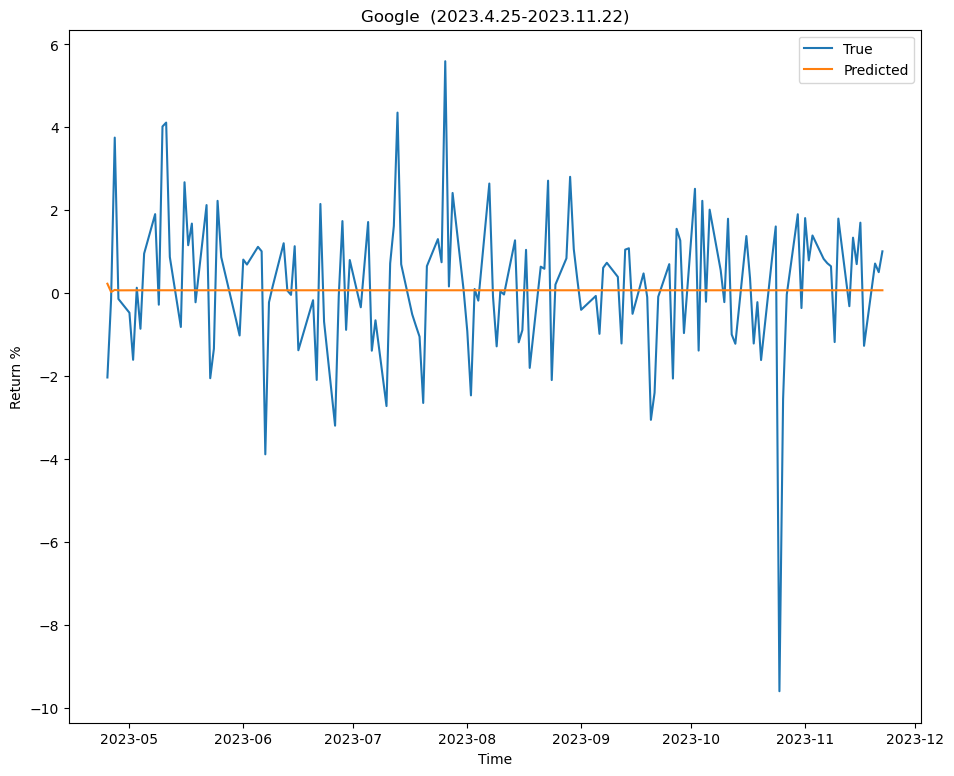

In [44]:
plt.plot(test['Google'], label='True')
plt.plot(forecast['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

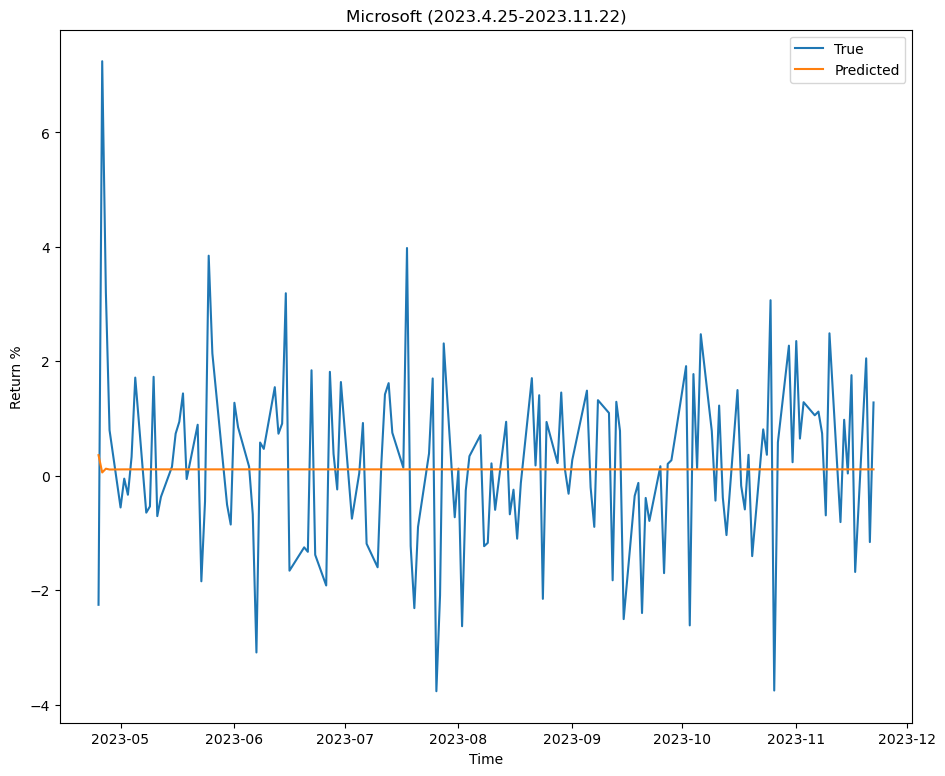

In [45]:
plt.plot(test['Microsoft'], label='True')
plt.plot(forecast['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

### Calculate the accuracy

In [46]:
def forecast_accuracy(forecast, actual):
    
    mse =np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  

    return({'mse':mse,'rmse':rmse})

In [47]:
print('Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(forecast['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\nForecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(forecast['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


Forecast Accuracy of: Google
mse :  3.0551
rmse :  1.7479

Forecast Accuracy of: Microsoft
mse :  2.399
rmse :  1.5489


## Rolling Forecast

In [48]:
rolling_predictions = pd.DataFrame()
test_size = 148

for i in range(test_size):
    train = df_all[:-(test_size-i)]  
    
    forecast_input = train.values[-1:]
    
    model = VAR(train)
    model_fitted = model.fit(1)
    pred = model_fitted.forecast(y=forecast_input, steps=1)
    forecast = pd.DataFrame(pred, columns=df_all.columns )
    rolling_predictions = rolling_predictions.append(forecast)

In [49]:
rolling_predictions.index = test.index
rolling_predictions

,Google,Microsoft,Apple,Amazon
Date,,,,
2023-04-25 00:00:00-04:00,0.228822,0.360894,0.196245,0.007034
2023-04-26 00:00:00-04:00,0.189385,0.427805,0.261714,0.087855
2023-04-27 00:00:00-04:00,-0.687121,-1.116647,-0.374988,0.203211
2023-04-28 00:00:00-04:00,-0.190197,-0.399532,-0.164586,-0.127740
2023-05-01 00:00:00-04:00,-0.352368,-0.246335,-0.209811,-0.129120
...,...,...,...,...
2023-11-16 00:00:00-05:00,-0.062032,0.010262,-0.004944,-0.053560
2023-11-17 00:00:00-05:00,-0.172767,-0.240744,-0.123346,-0.065166
2023-11-20 00:00:00-05:00,0.377707,0.531898,0.403226,0.191956


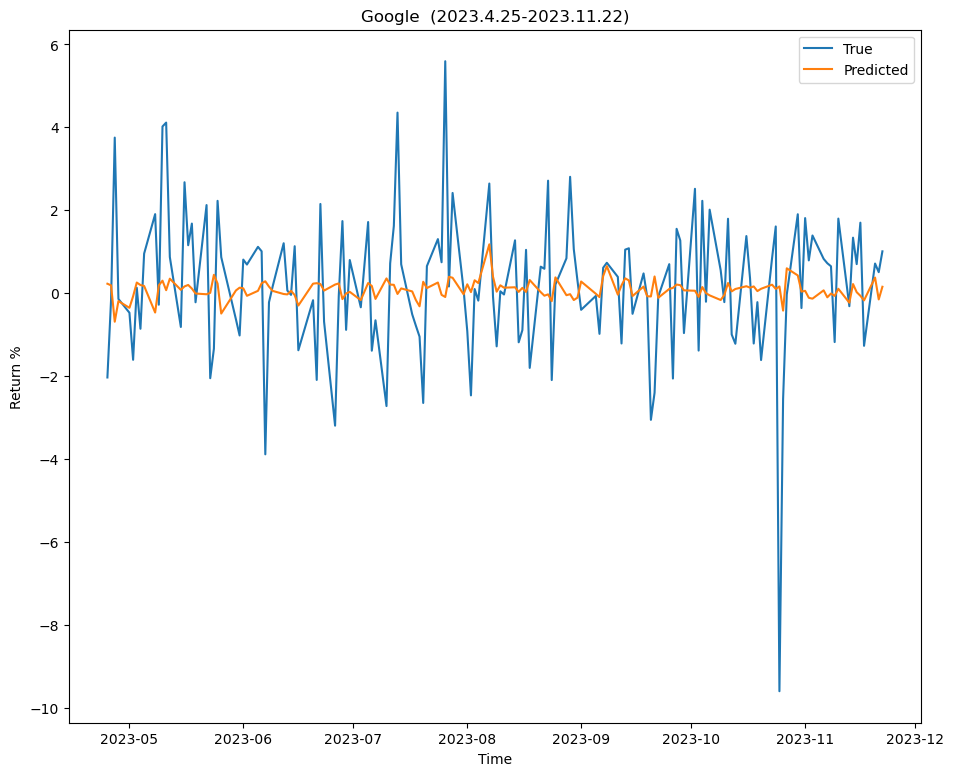

In [50]:
plt.plot(test['Google'], label='True')
plt.plot(rolling_predictions['Google'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Google  (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

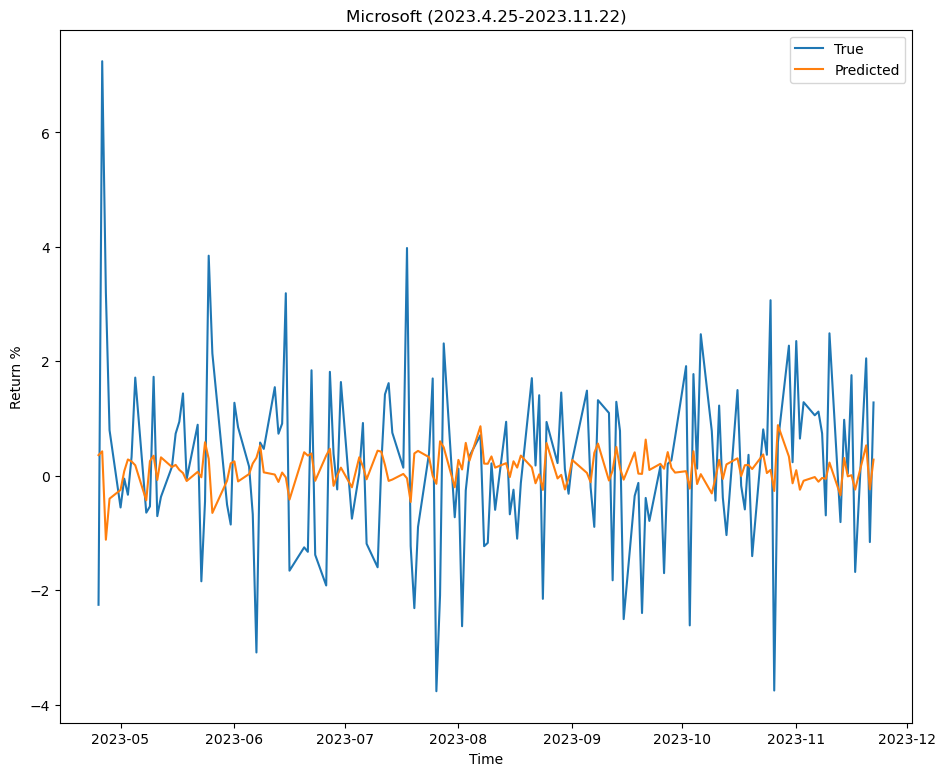

In [51]:
plt.plot(test['Microsoft'], label='True')
plt.plot(rolling_predictions['Microsoft'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Microsoft (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

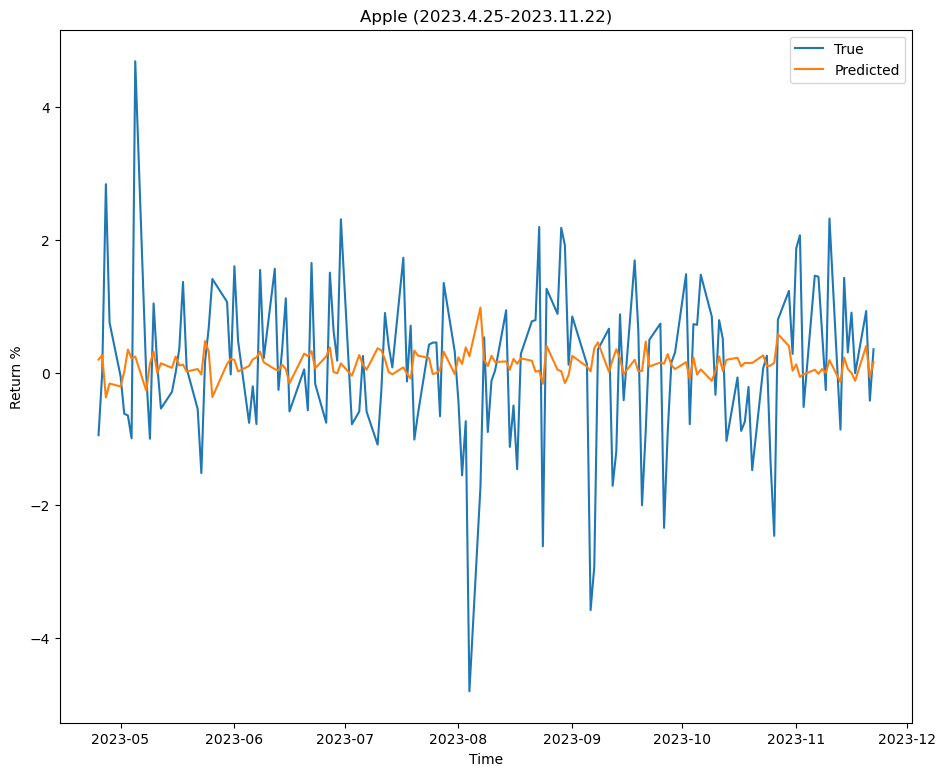

In [52]:
plt.plot(test['Apple'], label='True')
plt.plot(rolling_predictions['Apple'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Apple (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

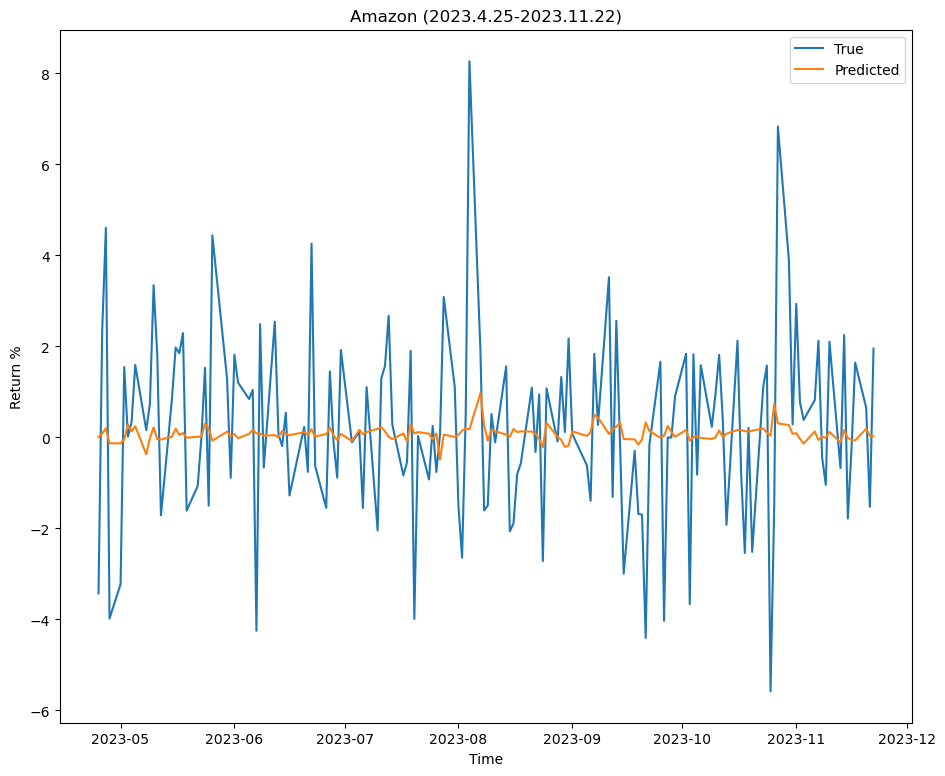

In [53]:
plt.plot(test['Amazon'], label='True')
plt.plot(rolling_predictions['Amazon'],label='Predicted')
plt.xlabel('Time')
plt.ylabel('Return %')
plt.title('Amazon (2023.4.25-2023.11.22)')
plt.legend()
plt.show()

In [56]:
# 这个最好放到ppt上

df_all.describe()

,Google,Microsoft,Apple,Amazon
count,1483.000000,1483.000000,1483.000000,1483.000000
mean,0.084701,0.122784,0.124567,0.086052
std,1.973396,1.910231,2.009380,2.242313
min,-11.100818,-14.739017,-12.864696,-14.049438
25%,-0.868650,-0.810043,-0.837632,-1.060933
50%,0.116582,0.131226,0.125450,0.123403
75%,1.104347,1.114292,1.198909,1.228387
max,10.448541,14.216865,11.980842,13.535902


## Evaluation

In [63]:
from sklearn.metrics import mean_absolute_error, r2_score

def forecast_accuracy(forecast, actual):
    mse = np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((forecast - actual) / actual)) * 100
    smape = np.mean(2.0 * np.abs(actual - forecast) / ((np.abs(actual) + np.abs(forecast)) + 1e-10)) * 100
    r2 = r2_score(actual, forecast)
    rse = np.sum((actual - forecast)**2) / np.sum((actual - np.mean(actual))**2)


    return {'mse': mse, 'rmse': rmse, 'mae': mae, 'mape': mape, 'smape': smape, 'r2': r2, 'rse': rse}

In [64]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = forecast_accuracy(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = forecast_accuracy(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = forecast_accuracy(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = forecast_accuracy(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Rolling Forecast Accuracy of: Google
mse :  3.0968
rmse :  1.7598
mae :  1.2581
mape :  123.4415
smape :  165.4837
r2 :  -0.0205
rse :  1.0205

 Rolling Forecast Accuracy of: Microsoft
mse :  2.3947
rmse :  1.5475
mae :  1.1637
mape :  107.627
smape :  156.3004
r2 :  -0.0081
rse :  1.0081

 Rolling Forecast Accuracy of: Apple
mse :  1.5851
rmse :  1.259
mae :  0.9402
mape :  inf
smape :  166.2481
r2 :  -0.0511
rse :  1.0511

 Rolling Forecast Accuracy of: Amazon
mse :  4.1531
rmse :  2.0379
mae :  1.5454
mape :  inf
smape :  176.4344
r2 :  0.0171
rse :  0.9829


### 把sMAPE摘出来看地更清晰

In [67]:
def smape(actual, forecast):
    smape = np.mean(2.0 * np.abs(actual - forecast) / ((np.abs(actual) + np.abs(forecast)) + 1e-10)) * 100
    return{'sMAPE': smape}

In [68]:
print('Rolling Forecast Accuracy of: Google')
accuracy_prod = smape(rolling_predictions['Google'], test['Google'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))


print('\n Rolling Forecast Accuracy of: Microsoft')
accuracy_prod = smape(rolling_predictions['Microsoft'], test['Microsoft'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Apple')
accuracy_prod = smape(rolling_predictions['Apple'], test['Apple'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))
    

print('\n Rolling Forecast Accuracy of: Amazon')
accuracy_prod = smape(rolling_predictions['Amazon'], test['Amazon'])
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Rolling Forecast Accuracy of: Google
sMAPE :  165.4837

 Rolling Forecast Accuracy of: Microsoft
sMAPE :  156.3004

 Rolling Forecast Accuracy of: Apple
sMAPE :  166.2481

 Rolling Forecast Accuracy of: Amazon
sMAPE :  176.4344
